In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


submitted: pd.DataFrame
submitted = (pd.read_csv('/mnt/eqa/zhangyuanfeng/methylation/evaluated/submitted_rmse.csv')
               .sort_values(by='lab', key=lambda s: s.apply(['BS1', 'BS2', 'BS3', 'BS4',
                                                             'EM1', 'EM2', 'EM3', 'EM4',
                                                             'RR1', 'PS1', 'PS2', 'PS3',
                                                             'RM1', 'MA1', 'MA2', 'MA3'].index), ignore_index=True))

submitted

,lab,sample,feature,fgroup,count,rmse
0,BS1,D6_2,global,global,22352800,17.149639
1,BS1,D6_1,global,global,28501895,17.027248
2,BS1,D5_2,global,global,22338724,17.889397
3,BS1,D5_1,global,global,22932557,17.824895
4,BS1,BL_2,global,global,33157745,14.838079
...,...,...,...,...,...,...
315,MA3,BL_2,global,global,753372,12.705825
316,MA3,D5_1,global,global,555864,15.181384
317,MA3,D5_2,global,global,556031,15.243044
318,MA3,D6_1,global,global,650224,13.933550


In [2]:
unified: pd.DataFrame
unified = (pd.concat([pd.read_csv('/mnt/eqa/zhangyuanfeng/methylation/unified_informed/evaluated/c_rmse/unified_rmse')
                        .query("feature == 'compact_depth_bin' & fgroup == '≥10x'"),
                      submitted[submitted['lab'].isin(['MA1', 'MA2', 'MA3'])]])
             .sort_values(by='lab', key=lambda s: s.apply(['BS1', 'BS2', 'BS3', 'BS4',
                                                           'EM1', 'EM2', 'EM3', 'EM4',
                                                           'RR1', 'PS1', 'PS2', 'PS3',
                                                           'RM1', 'NP1',
                                                           'MA1', 'MA2', 'MA3'].index), ignore_index=True))
unified

,lab,sample,feature,fgroup,count,rmse
0,BS1,F7_1,compact_depth_bin,≥10x,18462803,14.953261
1,BS1,F7_2,compact_depth_bin,≥10x,17964416,14.963168
2,BS1,BL_1,compact_depth_bin,≥10x,25925701,13.228193
3,BS1,BL_2,compact_depth_bin,≥10x,24263587,13.159559
4,BS1,BC_1,compact_depth_bin,≥10x,22841865,13.809189
...,...,...,...,...,...,...
325,MA3,T3_2,global,global,477313,14.489987
326,MA3,F7_2,global,global,595760,13.842521
327,MA3,M8_1,global,global,550163,13.481177
328,MA3,M8_2,global,global,550251,13.558554


In [3]:
unified_pivot: pd.DataFrame = unified.pivot(columns='sample', index='lab', values='rmse')
labels = ['D5', 'D6', 'F7', 'M8', 'T1', 'T2', 'T3', 'T4', 'BC', 'BL']
for label in labels:
    unified_pivot.loc['NP1', f'{label}_2'] = unified_pivot.loc['NP1', f'{label}_1']


<Axes: xlabel='sample', ylabel='lab'>

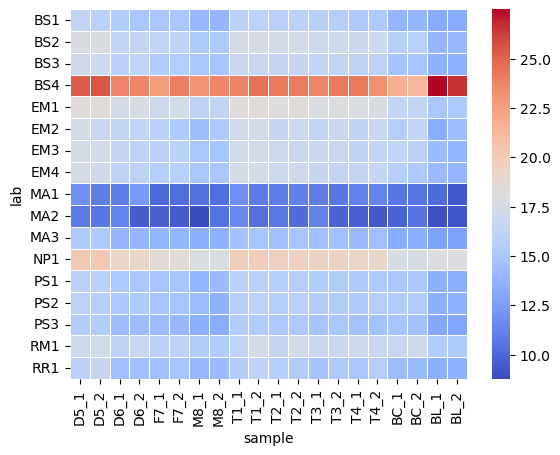

In [27]:
(sns.heatmap(data=unified_pivot[['D5_1', 'D5_2', 'D6_1', 'D6_2',
                                 'F7_1', 'F7_2', 'M8_1', 'M8_2',
                                 'T1_1', 'T1_2', 'T2_1', 'T2_2',
                                 'T3_1', 'T3_2', 'T4_1', 'T4_2',
                                 'BC_1', 'BC_2', 'BL_1', 'BL_2']],
             cmap='coolwarm', linewidths=.5))

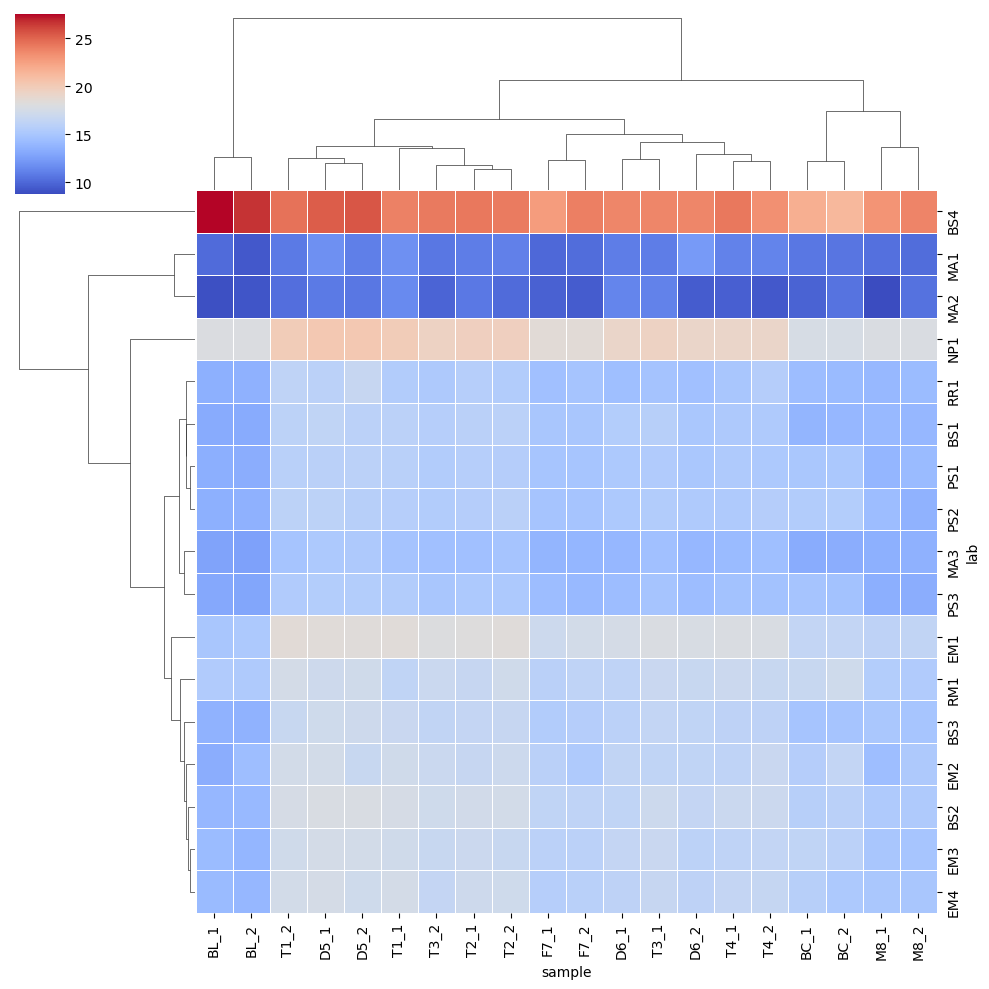

In [28]:
(sns.clustermap(data=unified_pivot,
                cmap='coolwarm', linewidths=.5))

<Axes: xlabel='lab', ylabel='rmse'>

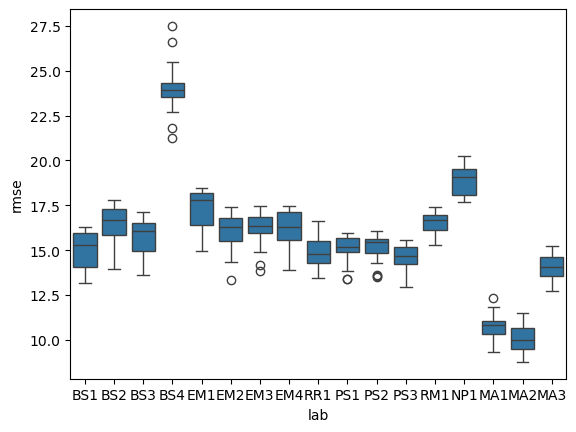

In [29]:
sns.boxplot(data=unified, x='lab', y='rmse')

In [32]:
unified[unified['lab'] == 'BS4']['rmse'].describe()

count    20.000000
mean     24.034925
std       1.434744
min      21.260504
25%      23.521460
50%      23.903642
75%      24.320134
max      27.498736
Name: rmse, dtype: float64

In [33]:
unified[unified['lab'].isin(['BS1', 'BS2', 'BS3'])]['rmse'].describe()

count    60.000000
mean     15.753526
std       1.185041
min      13.159559
25%      14.983603
50%      15.946358
75%      16.525244
max      17.792927
Name: rmse, dtype: float64

In [4]:
unified[unified['lab'].isin(['BS1', 'BS2', 'BS3', 'BS4'])]['rmse'].describe()

count    80.000000
mean     17.823875
std       3.816503
min      13.159559
25%      15.332570
50%      16.286824
75%      18.659821
max      27.498736
Name: rmse, dtype: float64

In [35]:
unified[unified['lab'].str.contains('EM')]['rmse'].describe()

count    80.000000
mean     16.427980
std       1.167466
min      13.361640
25%      15.867996
50%      16.479839
75%      17.262231
max      18.450955
Name: rmse, dtype: float64

In [36]:
unified[unified['lab'] == 'RR1']['rmse'].describe()

count    20.000000
mean     14.897367
std       0.868416
min      13.468904
25%      14.290979
50%      14.775065
75%      15.522269
max      16.605905
Name: rmse, dtype: float64

In [38]:
unified[unified['lab'] == 'RR1']['rmse'].describe()

count    20.000000
mean     14.897367
std       0.868416
min      13.468904
25%      14.290979
50%      14.775065
75%      15.522269
max      16.605905
Name: rmse, dtype: float64

In [37]:
unified[unified['lab'].str.contains('PS')]['rmse'].describe()

count    60.000000
mean     14.905092
std       0.835800
min      12.928631
25%      14.314731
50%      15.147022
75%      15.505613
max      16.041455
Name: rmse, dtype: float64

In [43]:
unified[unified['lab'] == 'PS3']['rmse'].describe()

count    20.000000
mean     14.704903
std       0.791708
min      13.201044
25%      14.420217
50%      14.872454
75%      15.289255
max      15.736970
Name: rmse, dtype: float64

In [34]:
unified[unified['lab'].str.contains('PS')].sort_values(by='rmse', ascending=True).head(n=2)

,lab,sample,feature,fgroup,count,rmse
227,PS3,BL_2,global,global,41480695,13.201044
226,PS3,BL_1,global,global,41363755,13.366092


In [35]:
unified[unified['lab'] == 'RM1']['rmse'].describe()

count    20.000000
mean     18.613274
std       0.823161
min      16.969745
25%      18.077676
50%      18.758893
75%      18.983521
max      20.043946
Name: rmse, dtype: float64

In [37]:
unified[unified['lab'] == 'RM1'].sort_values(by='rmse', ascending=True).head(n=2)

,lab,sample,feature,fgroup,count,rmse
245,RM1,BL_1,global,global,5102156,16.969745
244,RM1,BL_2,global,global,7994637,17.217411


In [39]:
unified[unified['lab'].str.contains('MA')]['rmse'].describe()

count    60.000000
mean     11.646318
std       1.900097
min       8.768032
25%      10.186139
50%      10.975916
75%      13.500521
max      15.243044
Name: rmse, dtype: float64

In [39]:
unified[unified['lab'] == 'MA2']['rmse'].describe()

count    20.000000
mean     10.070402
std       0.792577
min       8.768032
25%       9.478107
50%       9.990821
75%      10.659173
max      11.502879
Name: rmse, dtype: float64

In [42]:
unified[unified['lab'] == 'MA3']['rmse'].describe()

count    20.000000
mean     14.069597
std       0.736735
min      12.705825
25%      13.539210
50%      14.050824
75%      14.592771
max      15.243044
Name: rmse, dtype: float64

In [40]:
unified[unified['lab'] == 'RM1']['rmse'].describe()

count    20.000000
mean     16.475089
std       0.672348
min      15.308753
25%      16.102636
50%      16.683780
75%      16.963161
max      17.420302
Name: rmse, dtype: float64

In [41]:
unified[unified['lab'] == 'NP1']['rmse'].describe()

count    10.000000
mean     18.927042
std       0.900986
min      17.686542
25%      18.080541
50%      19.098705
75%      19.548538
max      20.249802
Name: rmse, dtype: float64

In [4]:
unified_pivot

sample,BC_1,BC_2,BL_1,BL_2,D5_1,D5_2,D6_1,D6_2,F7_1,F7_2,M8_1,M8_2,T1_1,T1_2,T2_1,T2_2,T3_1,T3_2,T4_1,T4_2
lab,,,,,,,,,,,,,,,,,,,,
BS1,13.809189,13.956052,13.228193,13.159559,16.271192,15.946387,15.504328,15.035218,14.953261,14.963168,14.100829,13.920989,15.946329,16.029516,15.926805,15.965340,15.720580,15.656713,15.239125,15.302931
BS2,15.769089,15.891719,13.924425,14.108254,17.768825,17.792927,16.301775,16.484343,16.271873,16.177055,15.335111,15.324946,17.606249,17.604789,17.298399,17.344603,16.985848,17.116774,16.849373,16.948130
BS3,14.776156,14.793246,13.669814,13.639663,17.119734,17.038407,15.974868,16.265581,15.482321,15.578328,14.990415,14.886425,16.746353,16.713641,16.482487,16.647946,16.378804,16.304689,16.086407,16.096035
BS4,21.791007,21.260504,27.498736,26.604509,25.244300,25.496941,23.683542,23.626154,22.719558,23.938238,23.097958,23.735063,23.869045,24.468266,24.270756,24.126406,23.641299,24.205844,24.212997,23.207377
EM1,16.388592,16.431329,14.968582,15.176475,18.415013,18.335579,17.529220,17.714897,17.007069,17.357910,16.085656,16.370521,18.390185,18.450955,18.146618,18.301659,17.872138,18.011104,17.884036,17.838846
EM2,15.593920,16.383115,13.361640,14.357559,17.333394,16.717144,16.345613,16.236142,15.875679,15.325892,14.346493,15.252624,17.238510,17.382829,16.620234,17.032222,16.250372,16.881809,16.175779,16.747768
EM3,16.255333,15.963825,14.198663,13.837426,17.441738,17.390921,16.472743,16.033389,16.002265,15.986523,14.968674,14.881521,17.187088,17.187932,16.938367,16.708751,16.810984,16.713289,16.205669,16.385063
EM4,15.789225,15.180716,14.157000,13.893330,17.477365,17.144004,16.123794,16.117696,15.701416,15.844949,15.002194,14.933271,17.469426,17.380831,17.099083,17.111704,16.601266,16.486935,16.487621,16.531307
MA1,10.647177,10.579626,10.148536,9.313718,11.836625,10.997334,10.909867,12.333107,9.969255,10.173037,10.339533,10.190506,11.806084,10.794573,10.892545,11.053279,10.954497,10.661514,11.124854,11.253415


In [15]:
unified_pivot.columns

Index(['BC_1', 'BC_2', 'BL_1', 'BL_2', 'D5_1', 'D5_2', 'D6_1', 'D6_2', 'F7_1',
       'F7_2', 'M8_1', 'M8_2', 'T1_1', 'T1_2', 'T2_1', 'T2_2', 'T3_1', 'T3_2',
       'T4_1', 'T4_2'],
      dtype='object', name='sample')

In [5]:
order_stat = (
    unified_pivot
           .assign(lab=unified_pivot.index)
           .melt(id_vars='lab', var_name='sample', value_name='rmse')
           .sort_values(['sample', 'rmse'])
           .assign(order=lambda x: x.groupby('sample').cumcount())[['lab', 'sample', 'order']]
           .pivot(columns='sample', index='lab', values='order')
           .assign(total=lambda df: df.sum(axis=1))
           .sort_values(by='total', ascending=True)
)
order_stat[['total'] + [i for i in order_stat.columns if i != 'total']]

sample,total,BC_1,BC_2,BL_1,BL_2,D5_1,D5_2,D6_1,D6_2,F7_1,...,M8_1,M8_2,T1_1,T1_2,T2_1,T2_2,T3_1,T3_2,T4_1,T4_2
lab,,,,,,,,,,,,,,,,,,,,,
MA2,3,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
MA1,17,1,1,1,1,1,1,0,1,1,...,1,0,1,1,1,1,0,1,1,1
MA3,42,2,2,2,2,2,2,2,2,2,...,3,3,2,2,2,2,2,2,2,2
PS3,63,5,5,3,3,3,3,3,3,3,...,2,2,3,3,3,3,4,3,3,3
RR1,100,4,4,7,7,5,7,4,4,4,...,5,7,4,7,5,4,3,4,4,7
PS1,109,7,7,6,5,4,6,5,5,6,...,4,6,6,4,6,5,5,6,6,4
BS1,114,3,3,4,4,7,5,7,6,7,...,6,5,7,5,7,7,7,7,5,5
PS2,120,8,9,8,6,6,4,6,7,5,...,7,4,5,6,4,6,6,5,7,6
BS3,168,6,6,9,8,9,9,8,11,8,...,10,9,9,8,8,8,9,8,8,8


In [ ]:
for idx, lab in enumerate(order_stat.index):
    print(f"{idx + 1}\t{lab}\t{order_stat.loc[lab, 'total']}")

1	MA2	3
2	MA1	17
3	MA3	42
4	PS3	63
5	RR1	100
6	PS1	109
7	BS1	114
8	PS2	120
9	BS3	168
10	EM2	198
11	EM4	205
12	EM3	208
13	RM1	235
14	BS2	242
15	EM1	276
16	NP1	300
17	BS4	320


In [45]:
order_stat[order_stat.index.str.contains('BS')]['total'].mean()

211.0

In [46]:
order_stat[order_stat.index.isin(['BS1', 'BS2', 'BS3'])]['total'].mean()

174.66666666666666

In [47]:
order_stat[order_stat.index.str.contains('EM')]['total'].mean()

221.75

In [55]:
order_stat[order_stat.index.str.contains('PS')]['total'].mean()

117.66666666666667

In [48]:
unified.to_csv(
    '/mnt/eqa/zhangyuanfeng/methylation/data_for_plot/3_quantative_rmse_spearmanr/unified_rmse.csv',
    index=False
)